# Predict Bike Sharing Demand with AutoGluon


In this project, you'll use the AutoGluon library to train several models for the Bike Sharing Demand competition in Kaggle. You will be using Tabular Prediction to fit data from CSV files provided by the competition.

## Step 1: Download the Kaggle dataset using the kaggle python library

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" 
!pip install bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 13.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
import json
kaggle_username = "mohsenm95"
kaggle_key = "b17fcefff7ca1ce81c28a08d08165cbd"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [5]:
!kaggle competitions download -c bike-sharing-demand
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 749kB/s]
100% 189k/189k [00:00<00:00, 748kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [38]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so, you can use some `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
# Simple output of the train dataset to view some min/max/variation of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [40]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [41]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [42]:
train = train.drop(columns=['casual', 'registered'])

In [43]:
predictor = TabularPredictor(
    label = "count",
    problem_type = "regression",
    eval_metric = "root_mean_squared_error"
).fit(
    train_data = train,
    time_limit = 600,
    presets = "best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_063352/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_063352/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11070.41 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note

### Review AutoGluon's training run with ranking of models that did the best.

In [44]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.835046      17.431302  517.457853                0.001134           0.432165            3       True         15
1   RandomForestMSE_BAG_L2  -53.323642      16.488791  414.543897                0.650382          28.188541            2       True         12
2     ExtraTreesMSE_BAG_L2  -54.032512      16.484182  394.325898                0.645773           7.970543            2       True         14
3          LightGBM_BAG_L2  -55.005870      16.075361  412.062018                0.236952          25.706662            2       True         11
4          CatBoost_BAG_L2  -55.697910      15.897062  455.159943                0.058653          68.804587            2       True         13
5        LightGBMXT_BAG_L2  -60.136965      18.665762  429.996201         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

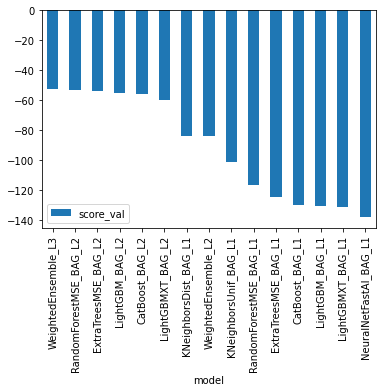

In [45]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

### Create predictions from test dataset

In [46]:
predictions = predictor.predict(test)
predictions.head()

0    23.918108
1    41.809868
2    45.174591
3    48.650589
4    51.392319
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [47]:
# Describe the `predictions` series to see if there are any negative values
print(any(predictions<0))

False


In [48]:
# How many negative values do we have?
predictions.lt(0).sum().sum()

0

In [49]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [50]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [51]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 200kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [52]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2023-01-01 06:47:24  first raw submission               complete  1.80654      1.80654       
submission.csv               2023-01-01 06:21:25  first raw submission               complete  0.46659      0.46659       
submission_new_hpo.csv       2022-12-31 19:29:29  new features with hyperparameters  complete  0.52633      0.52633       
submission_new_hpo.csv       2022-12-31 19:05:33  new features with hyperparameters  complete  0.53261      0.53261       


#### Initial score of 1.79580

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

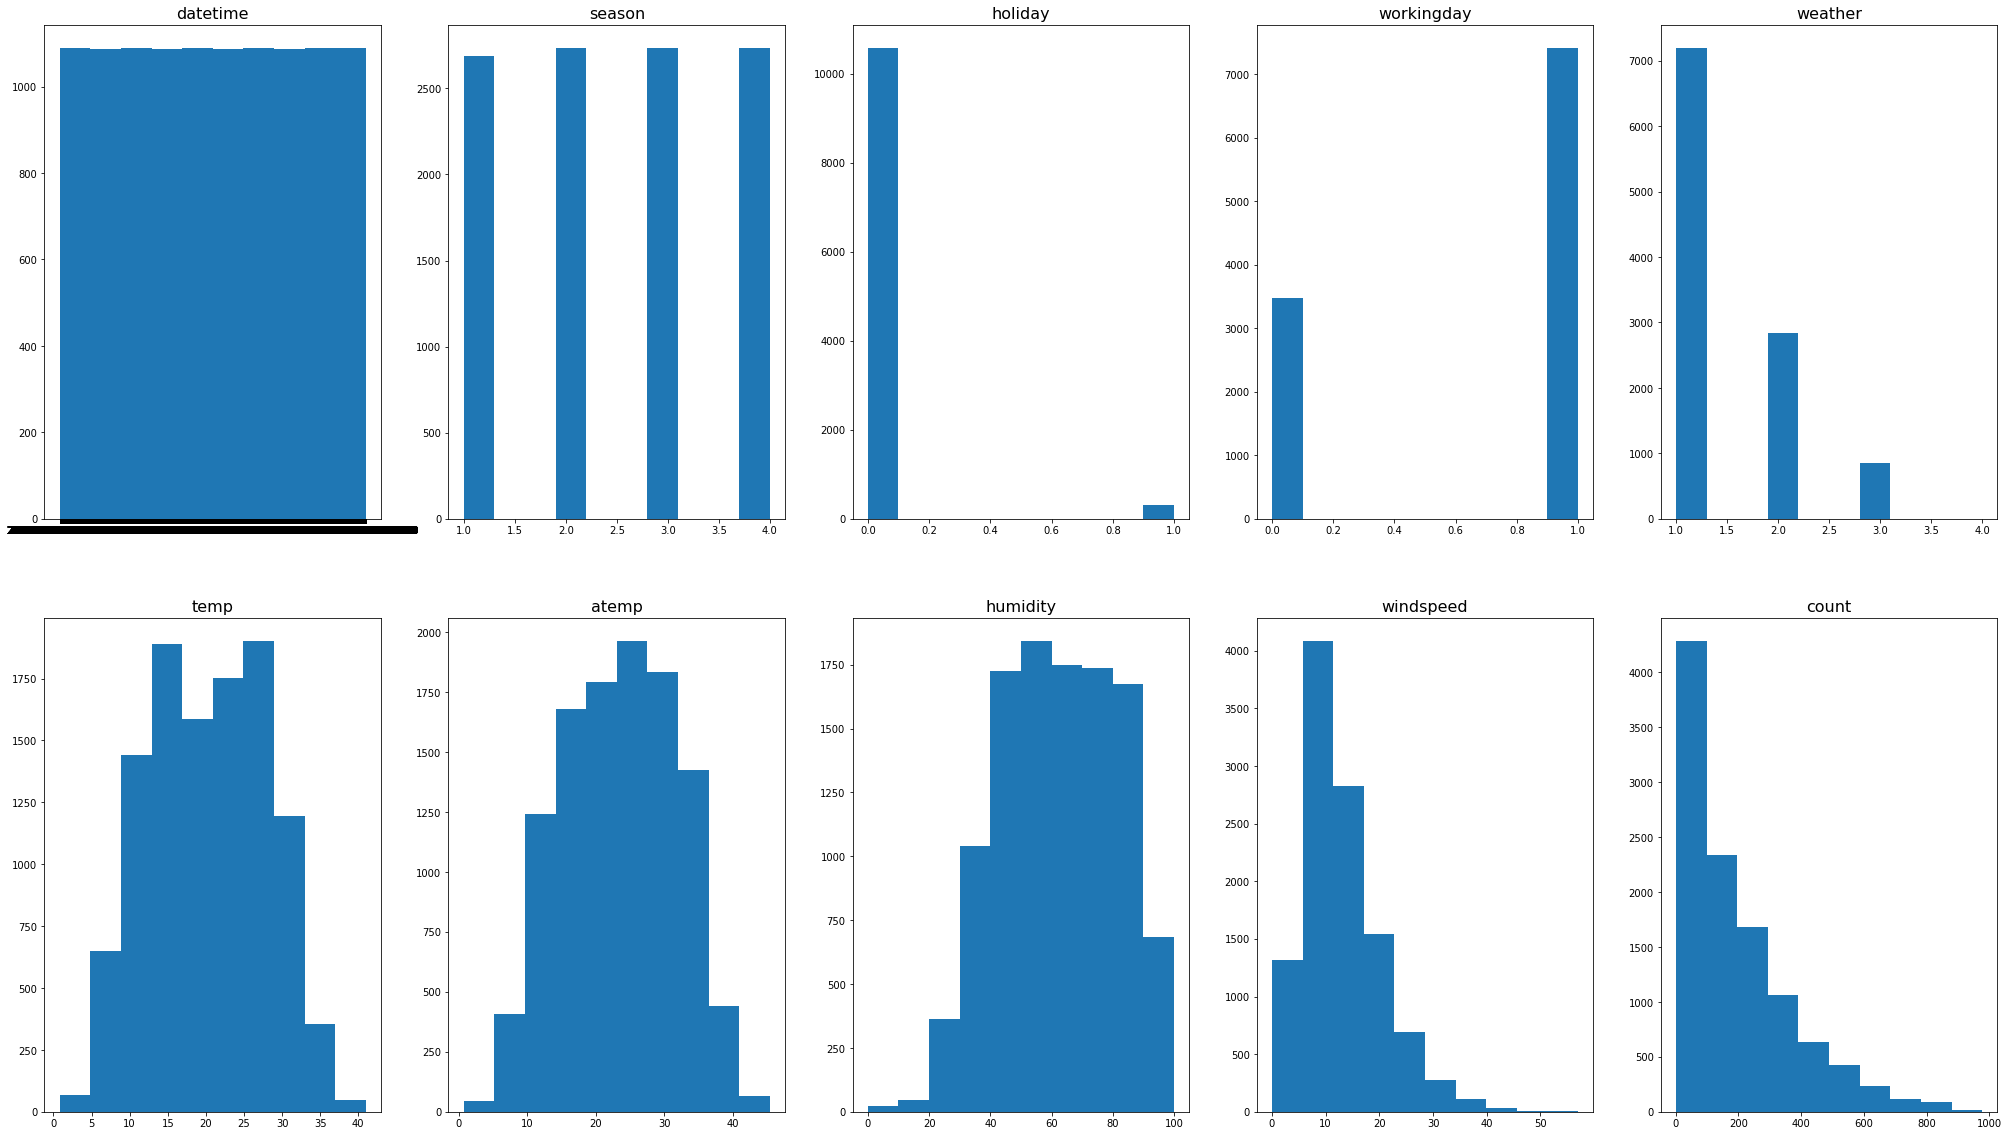

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(35,20))
plt.subplot(2, 5, 1)
plt.title('datetime', fontsize=16)
plt.hist(train['datetime'])

plt.subplot(2, 5, 2)
plt.title('season', fontsize=16)
plt.hist(train['season'])

plt.subplot(2, 5, 3)
plt.title('holiday', fontsize=16)
plt.hist(train['holiday'])

plt.subplot(2, 5, 4)
plt.title('workingday', fontsize=16)
plt.hist(train['workingday'])

plt.subplot(2, 5, 5)
plt.title('weather', fontsize=16)
plt.hist(train['weather'])

plt.subplot(2, 5, 6)
plt.title('temp', fontsize=16)
plt.hist(train['temp'])

plt.subplot(2, 5, 7)
plt.title('atemp', fontsize=16)
plt.hist(train['atemp'])

plt.subplot(2, 5, 8)
plt.title('humidity', fontsize=16)
plt.hist(train['humidity'])

plt.subplot(2, 5, 9)
plt.title('windspeed', fontsize=16)
plt.hist(train['windspeed'])

plt.subplot(2, 5, 10)
plt.title('count', fontsize=16)
plt.hist(train['count'])

plt.show()

In [54]:
# create a new feature
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train['minute'] = train['datetime'].apply(lambda x: x.minute)
train['second'] = train['datetime'].apply(lambda x: x.second)
train = train.drop(columns=['datetime'])

test['datetime'] = pd.to_datetime(test['datetime'])
test['year'] = test['datetime'].apply(lambda x: x.year)
test['month'] = test['datetime'].apply(lambda x: x.month)
test['day'] = test['datetime'].apply(lambda x: x.day)
test['hour'] = test['datetime'].apply(lambda x: x.hour)
test['minute'] = test['datetime'].apply(lambda x: x.minute)
test['second'] = test['datetime'].apply(lambda x: x.second)
test = test.drop(columns=['datetime'])

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [55]:
encoded_df = pd.get_dummies(train['season'], prefix='season')
train = pd.concat([train, encoded_df], axis=1)
train = train.drop(columns=['season'])

encoded_df = pd.get_dummies(train['weather'], prefix='weather')
train = pd.concat([train, encoded_df], axis=1)
train = train.drop(columns=['weather'])

encoded_df = pd.get_dummies(test['season'], prefix='season')
test = pd.concat([test, encoded_df], axis=1)
test = test.drop(columns=['season'])

encoded_df = pd.get_dummies(test['weather'], prefix='weather')
test = pd.concat([test, encoded_df], axis=1)
test = test.drop(columns=['weather'])

In [56]:
from sklearn.preprocessing import StandardScaler
import numpy as np

temp_scaler = StandardScaler()
train['temp'] = temp_scaler.fit_transform(np.array(train['temp']).reshape(-1, 1))

atemp_scaler = StandardScaler()
train['atemp'] = atemp_scaler.fit_transform(np.array(train['atemp']).reshape(-1, 1))

humidity_scaler = StandardScaler()
train['humidity'] = humidity_scaler.fit_transform(np.array(train['humidity']).reshape(-1, 1))

windspeed_scaler = StandardScaler()
train['windspeed'] = windspeed_scaler.fit_transform(np.array(train['windspeed']).reshape(-1, 1))

test['temp'] = temp_scaler.transform(np.array(test['temp']).reshape(-1, 1))
test['atemp'] = atemp_scaler.transform(np.array(test['atemp']).reshape(-1, 1))
test['humidity'] = humidity_scaler.transform(np.array(test['humidity']).reshape(-1, 1))
test['windspeed'] = windspeed_scaler.transform(np.array(test['windspeed']).reshape(-1, 1))

In [57]:
# View are new feature
train.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,year,month,day,...,minute,second,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,-1.333661,-1.092737,0.993213,-1.567754,16,2011,1,1,...,0,0,1,0,0,0,1,0,0,0
1,0,0,-1.438907,-1.182421,0.941249,-1.567754,40,2011,1,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,-1.438907,-1.182421,0.941249,-1.567754,32,2011,1,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,-1.333661,-1.092737,0.681430,-1.567754,13,2011,1,1,...,0,0,1,0,0,0,1,0,0,0
4,0,0,-1.333661,-1.092737,0.681430,-1.567754,1,2011,1,1,...,0,0,1,0,0,0,1,0,0,0


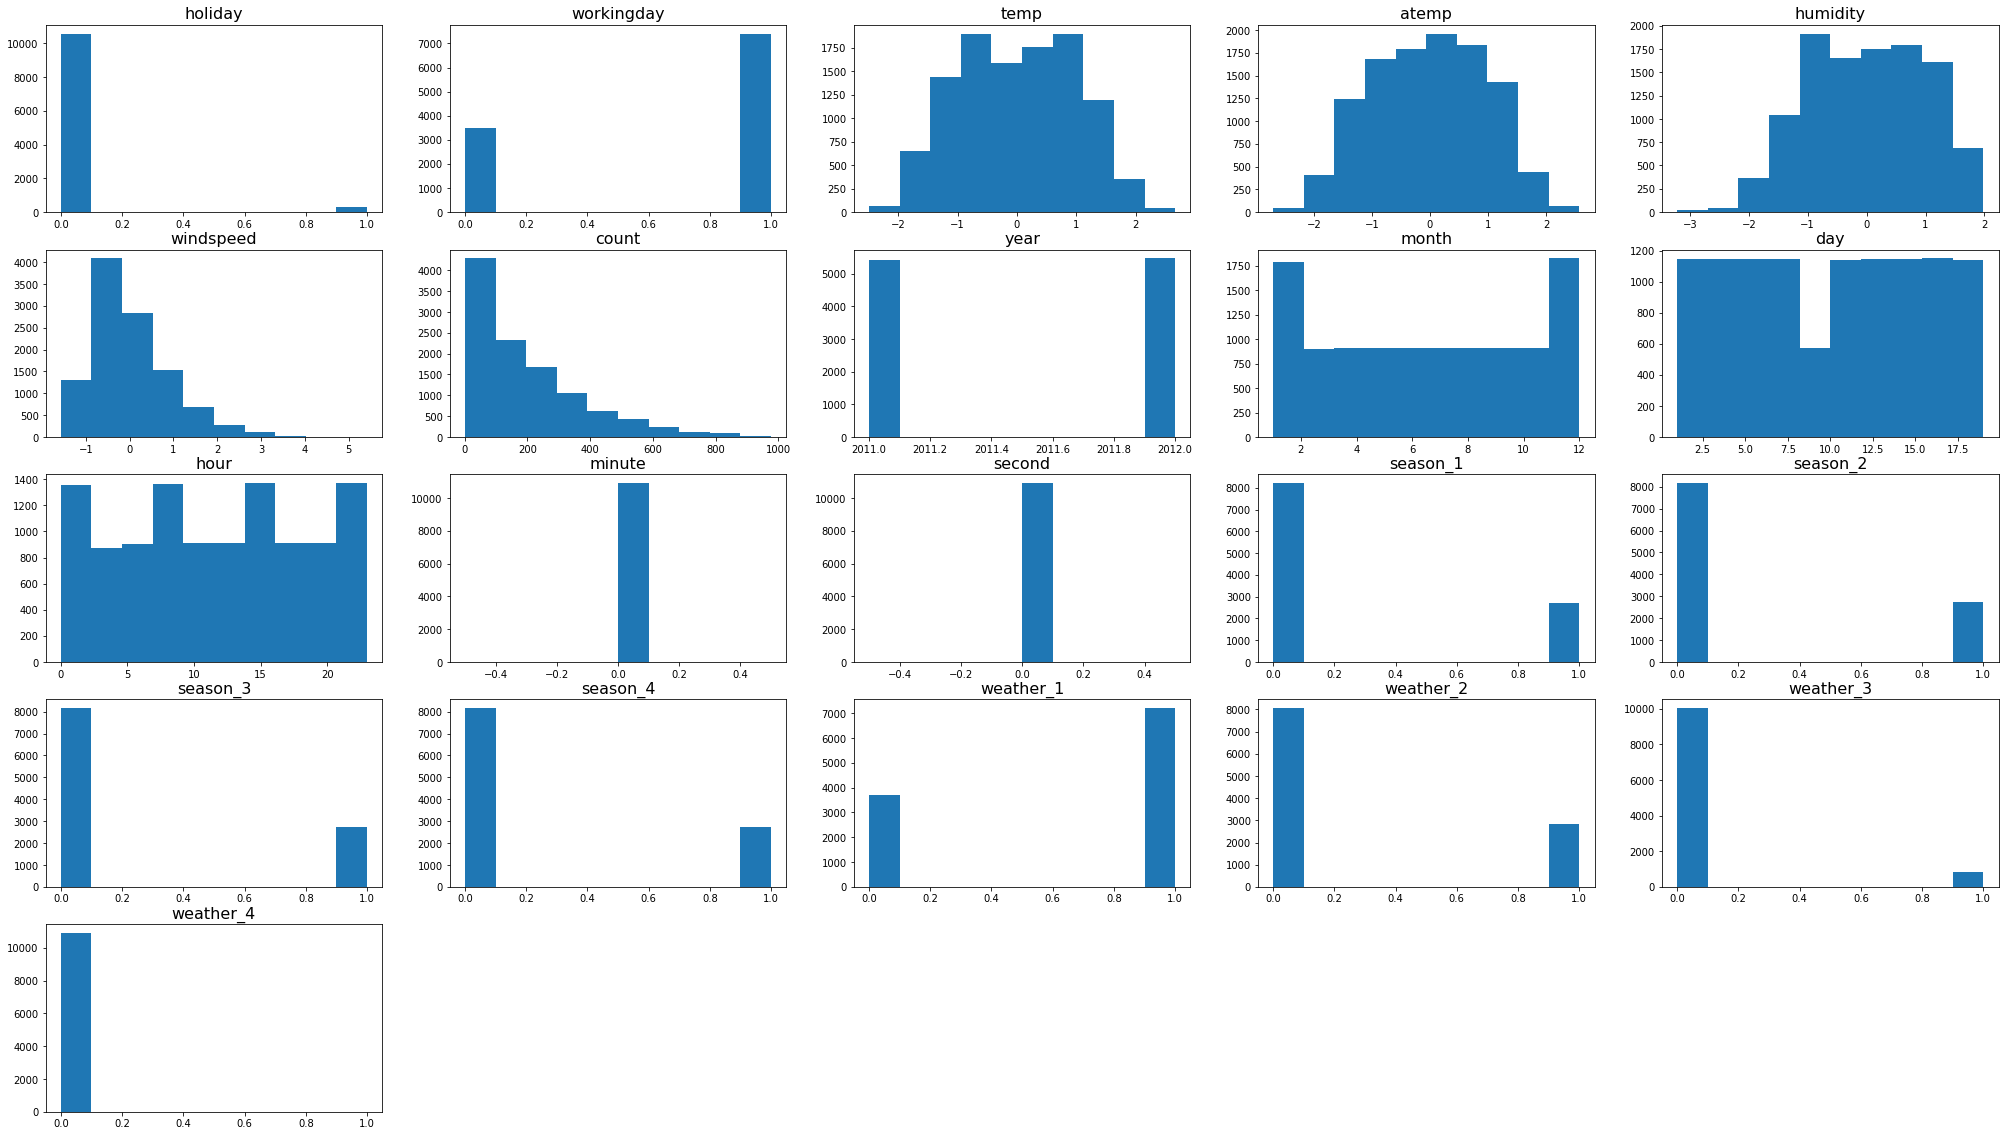

In [58]:
plt.figure(figsize=(35,20))

plt.subplot(5, 5, 1)
plt.title('holiday', fontsize=16)
plt.hist(train['holiday'])

plt.subplot(5, 5, 2)
plt.title('workingday', fontsize=16)
plt.hist(train['workingday'])

plt.subplot(5, 5, 3)
plt.title('temp', fontsize=16)
plt.hist(train['temp'])

plt.subplot(5, 5, 4)
plt.title('atemp', fontsize=16)
plt.hist(train['atemp'])

plt.subplot(5, 5, 5)
plt.title('humidity', fontsize=16)
plt.hist(train['humidity'])

plt.subplot(5, 5, 6)
plt.title('windspeed', fontsize=16)
plt.hist(train['windspeed'])

plt.subplot(5, 5, 7)
plt.title('count', fontsize=16)
plt.hist(train['count'])

plt.subplot(5, 5, 8)
plt.title('year', fontsize=16)
plt.hist(train['year'])

plt.subplot(5, 5, 9)
plt.title('month', fontsize=16)
plt.hist(train['month'])

plt.subplot(5, 5, 10)
plt.title('day', fontsize=16)
plt.hist(train['day'])

plt.subplot(5, 5, 11)
plt.title('hour', fontsize=16)
plt.hist(train['hour'])

plt.subplot(5, 5, 12)
plt.title('minute', fontsize=16)
plt.hist(train['minute'])

plt.subplot(5, 5, 13)
plt.title('second', fontsize=16)
plt.hist(train['second'])

plt.subplot(5, 5, 14)
plt.title('season_1', fontsize=16)
plt.hist(train['season_1'])

plt.subplot(5, 5, 15)
plt.title('season_2', fontsize=16)
plt.hist(train['season_2'])

plt.subplot(5, 5, 16)
plt.title('season_3', fontsize=16)
plt.hist(train['season_3'])

plt.subplot(5, 5, 17)
plt.title('season_4', fontsize=16)
plt.hist(train['season_4'])

plt.subplot(5, 5, 18)
plt.title('weather_1', fontsize=16)
plt.hist(train['weather_1'])

plt.subplot(5, 5, 19)
plt.title('weather_2', fontsize=16)
plt.hist(train['weather_2'])

plt.subplot(5, 5, 20)
plt.title('weather_3', fontsize=16)
plt.hist(train['weather_3'])

plt.subplot(5, 5, 21)
plt.title('weather_4', fontsize=16)
plt.hist(train['weather_4'])

plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [59]:
predictor_new_features = TabularPredictor(
    label = "count",
    problem_type = "regression",
    eval_metric = "root_mean_squared_error"
  ).fit(
      train_data = train,
      time_limit = 600,
      presets = "best_quality"   
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_065005/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_065005/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10812.86 MB
	Train Data (Original)  Memory Usage: 1.13 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

In [60]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -35.679647      32.168507  555.355923                0.001269           0.372600            3       True         16
1      WeightedEnsemble_L2  -35.933275      29.681589  363.405744                0.000965           0.370219            2       True          9
2          CatBoost_BAG_L2  -35.934630      30.246565  439.188678                0.057654          33.117415            2       True         13
3     ExtraTreesMSE_BAG_L2  -36.144358      30.841286  418.239038                0.652375          12.167774            2       True         14
4          LightGBM_BAG_L2  -36.290443      30.291283  430.794765                0.102371          24.723502            2       True         11
5   RandomForestMSE_BAG_L2  -36.495899      30.852794  433.666075         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -89.96695566372658,
  'KNeighborsDist_BAG_L1': -88.23416597632651,

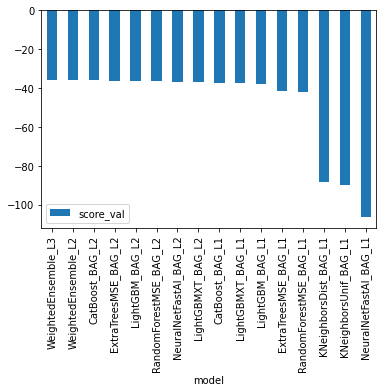

In [61]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [62]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features[predictions_new_features < 0] = 0

In [63]:
# Same submitting predictions
submission_new_features = submission
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [64]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 210kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-01-01 07:02:27  new features                       complete  0.46995      0.46995       
submission.csv               2023-01-01 06:47:24  first raw submission               complete  1.80654      1.80654       
submission.csv               2023-01-01 06:21:25  first raw submission               complete  0.46659      0.46659       
submission_new_hpo.csv       2022-12-31 19:29:29  new features with hyperparameters  complete  0.52633      0.52633       


#### New Score of 0.46995 

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [66]:
import autogluon.core as ag

nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

gbm1_options = {
    'num_boost_round': 100
}

gbm2_options = {
    'num_boost_round': 200
}

hyperparameters = {
    'NN': nn_options,
    'GBM': gbm1_options,
    'GBM': gbm2_options
}

# try at most 3 different hyperparameter configurations for each type of model
num_trials = 3

# to tune hyperparameters using random search routine with a local scheduler
search_strategy = 'auto'

hyperparameter_tune_kwargs = {
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

In [67]:
predictor_new_hpo = TabularPredictor(
    label = "count",
    problem_type = "regression",
    eval_metric = "root_mean_squared_error"
  ).fit(
      train_data = train,
      time_limit = 600,
      presets = "best_quality",
      num_bag_sets=1,
      hyperparameters = hyperparameters, 
      hyperparameter_tune_kwargs = hyperparameter_tune_kwargs,
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230101_070333/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230101_070333/"
AutoGluon Version:  0.6.1
Python Version:     3.8.16
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Aug 26 08:44:51 UTC 2022
Train Data Rows:    10886
Train Data Columns: 20
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10919.2 MB
	Train Data (Original)  Memory Usage: 1.13 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note:

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L1/T1 ...
	-41.2565	 = Validation score   (-root_mean_squared_error)
	24.63s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-38.2204	 = Validation score   (-root_mean_squared_error)
	23.37s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-40.6632	 = Validation score   (-root_mean_squared_error)
	22.57s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L1 ... Tuning model for up to 179.88s of the 528.97s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetMXNet_BAG_L1/T1 ...
	-94.7667	 = Validation score   (-root_mean_squared_error)
	83.79s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L1/T2 ...
	-105.3215	 = Validation score   (-root_mean_squared_error)
	79.45s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 365.58s of remaining time.
	-38.163	 = Validation score   (-root_mean_squared_error)
	0.26s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 2 L2 models ...
Hyperparameter tuning model: LightGBM_BAG_L2 ... Tuning model for up to 164.38s of the 365.28s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2/T1 ...
	-39.0186	 = Validation score   (-root_mean_squared_error)
	26.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-39.708	 = Validation score   (-root_mean_squared_error)
	26.14s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-39.0546	 = Validation score   (-root_mean_squared_error)
	22.9s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetMXNet_BAG_L2 ... Tuning model for up to 164.38s of the 289.93s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetMXNet_BAG_L2/T1 ...
	-39.9869	 = Validation score   (-root_mean_squared_error)
	81.69s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: NeuralNetMXNet_BAG_L2/T2 ...
	-59.2306	 = Validation score   (-root_mean_squared_error)
	68.46s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 139.63s of remaining time.
	-38.6342	 = Validation score   (-root_mean_squared_error)
	0.3s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 460.75s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230101_070333/")


In [68]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2  -38.163024       0.001030   70.834871                0.000674           0.264607            2       True          6
1         LightGBM_BAG_L1/T2  -38.220388       0.000129   23.366467                0.000129          23.366467            1       True          2
2        WeightedEnsemble_L3  -38.634211       0.002237  459.486344                0.000979           0.303727            3       True         12
3         LightGBM_BAG_L2/T1  -39.018584       0.000767  259.989165                0.000114          26.177173            2       True          7
4         LightGBM_BAG_L2/T3  -39.054631       0.000775  256.708821                0.000122          22.896830            2       True          9
5         LightGBM_BAG_L2/T2  -39.707969       0.000804  259.9

{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'NeuralNetMXNet_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'NeuralNetMXNet_BAG_L1/T2': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'NeuralNetMXNet_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'NeuralNetMXNet_BAG_L2/T2': 'StackerEnsembleModel_TabularNeuralNetMxnet',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -41.25649060789932,
  'LightGBM_BAG_L1/T2': -38.22038755891459,
  'LightGBM_BAG_L1/T3': -40.663208972131784,
  'NeuralNetMXNet_BAG_L1/T1': -94.7666637256548,
  'NeuralNetMXNet_BAG_L1/T2': -105.3215195209248,
  'WeightedEnse

In [69]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [70]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 228kB/s]
Successfully submitted to Bike Sharing Demand

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-01-01 07:13:51  new features with hyperparameters  complete  0.52633      0.52633       
submission_new_features.csv  2023-01-01 07:02:27  new features                       complete  0.46995      0.46995       
submission.csv               2023-01-01 06:47:24  first raw submission               complete  1.80654      1.80654       
submission.csv               2023-01-01 06:21:25  first raw submission               complete  0.46659      0.46659       


#### New Score of 0.52633

## Step 7: Write a Report
You can use the report of the notebook in [report.md](./report.md)
### Creating plots and table for report

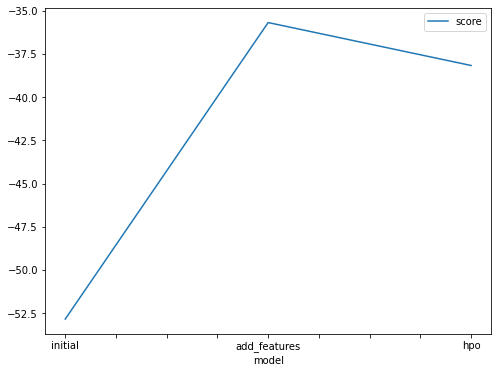

In [73]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-52.835046, -35.679647, -38.163024]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

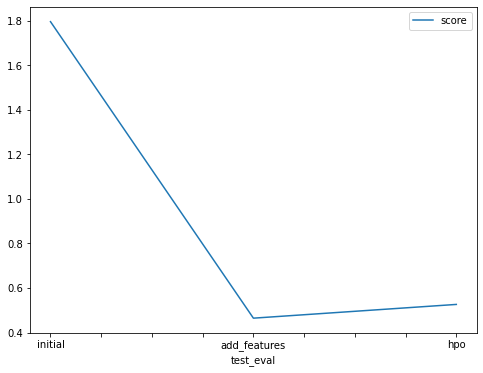

In [74]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.79580, 0.46465, 0.52633]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [75]:
# The 3 hyperparameters we tuned with the kaggle score as the result

nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1),
}

pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default vals", "default vals", 'GBM: num_boost_round: 100'],
    "hpo2": ["default vals", "default vals", 'GBM: num_boost_round: 200'],
    "hpo3": ["default vals", "default vals", 'NN: {num_epochs: 10, learning_rate: 1e-4, 1e-2, activation: relu, softrelu, tanh}'],
    "score": [1.79580, 0.46465, 0.52633]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default vals,default vals,default vals,1.79580
1,add_features,default vals,default vals,default vals,0.46465
2,hpo,GBM: num_boost_round: 100,GBM: num_boost_round: 200,"NN: {num_epochs: 10, learning_rate: 1e-4, 1e-2, activation: relu, softrelu, tanh}",0.52633


In [79]:
!jupyter nbconvert --to html '/content/Predict_Bike_Sharing_Demand_with_AutoGluon_Template.ipynb'

[NbConvertApp] Converting notebook /content/Predict_Bike_Sharing_Demand_with_AutoGluon_Template.ipynb to html
[NbConvertApp] Writing 821018 bytes to /content/Predict_Bike_Sharing_Demand_with_AutoGluon_Template.html
